<a href="https://colab.research.google.com/github/AdhidevAthman/AdhidevAthman/blob/main/Tesla_Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose



In [4]:
pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00


In [2]:
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


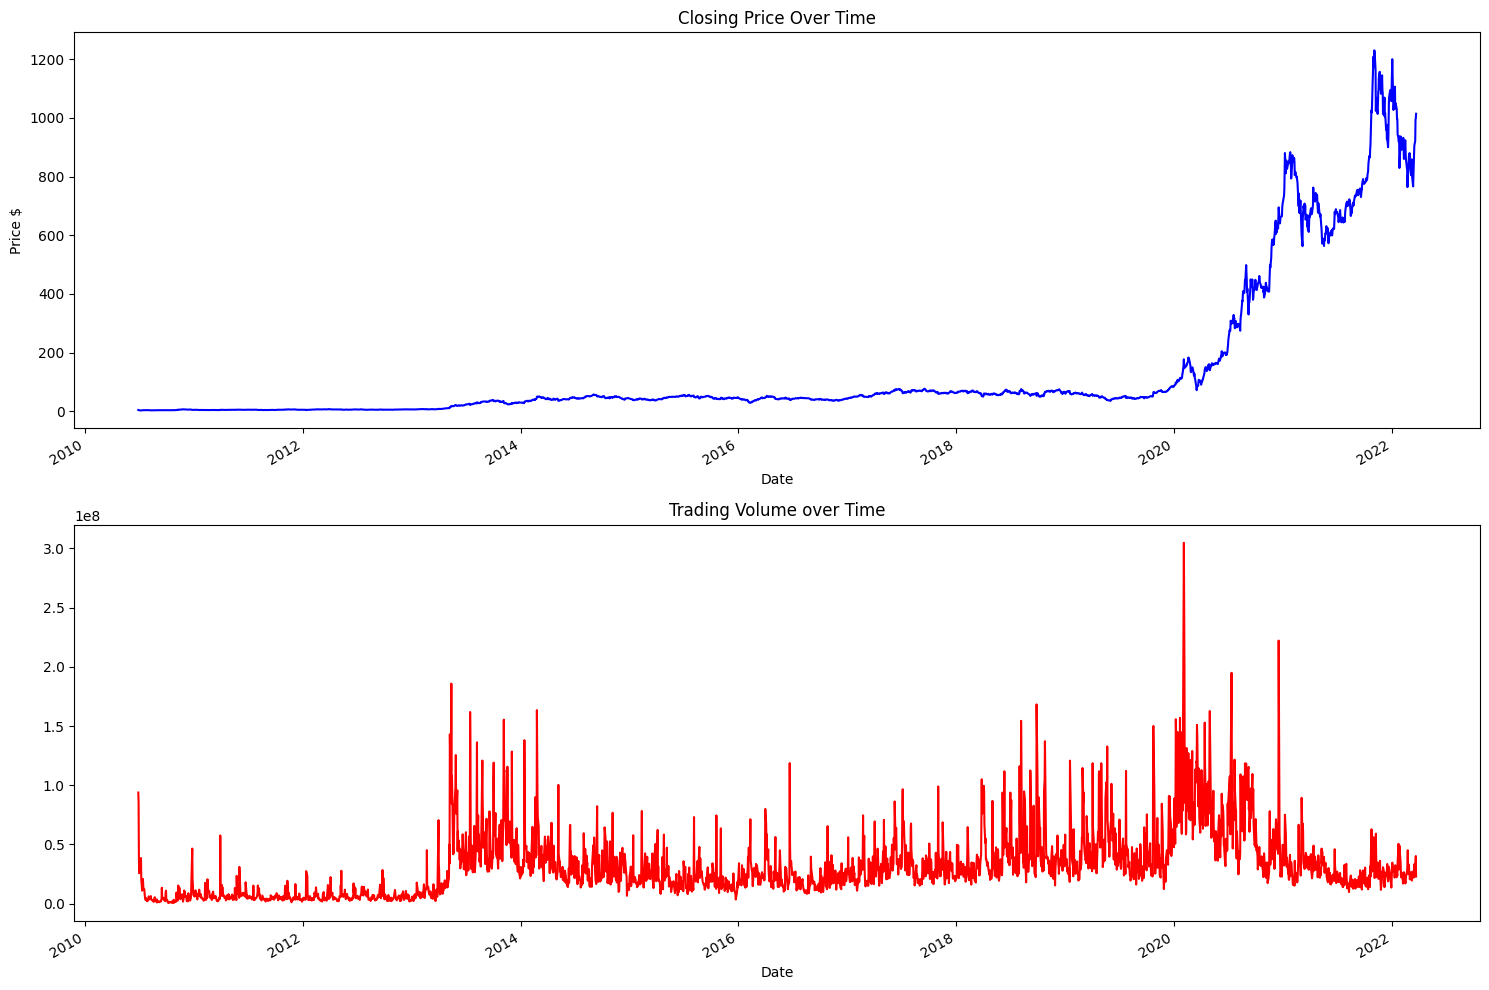

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,10))

df['Close'].plot(ax=ax[0],color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price $')

df['Volume'].plot(ax=ax[1],color='red')
ax[1].set_title('Trading Volume over Time')
ax[1].set_label('Volume')

plt.tight_layout()
plt.show()

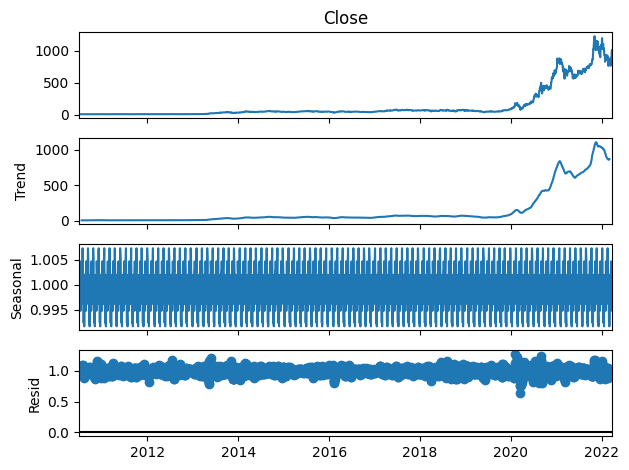

In [8]:
# Seasonality Analysis
result=seasonal_decompose(df['Close'],model='multiplicative',period=30)
fig=result.plot()
plt.show()

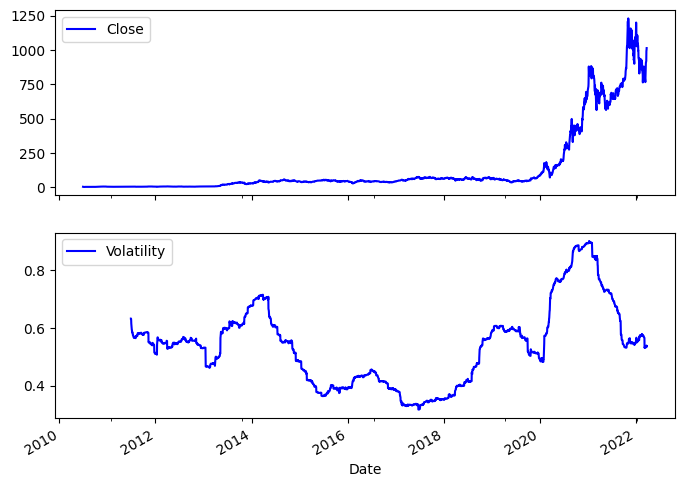

In [12]:
# Volatility Analysis
df['Returns']=df['Close'].pct_change()
df['Volatility']=df['Returns'].rolling(window=252).std() * np.sqrt(252)
df[['Close','Volatility']].plot(subplots=True,color='blue',figsize=(8,6))
plt.show()

In [14]:
prophet_df=df.reset_index()[['Date','Close']]
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True)
prophet_df.head()

,ds,y
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [15]:
model=Prophet(daily_seasonality=True)

In [16]:
model.fit(prophet_df)
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzofja3yg/jpriru3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzofja3yg/4ksz5ush.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2722', 'data', 'file=/tmp/tmpzofja3yg/jpriru3j.json', 'init=/tmp/tmpzofja3yg/4ksz5ush.json', 'output', 'file=/tmp/tmpzofja3yg/prophet_modeljqpzt8i3/prophet_model-20250912064941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


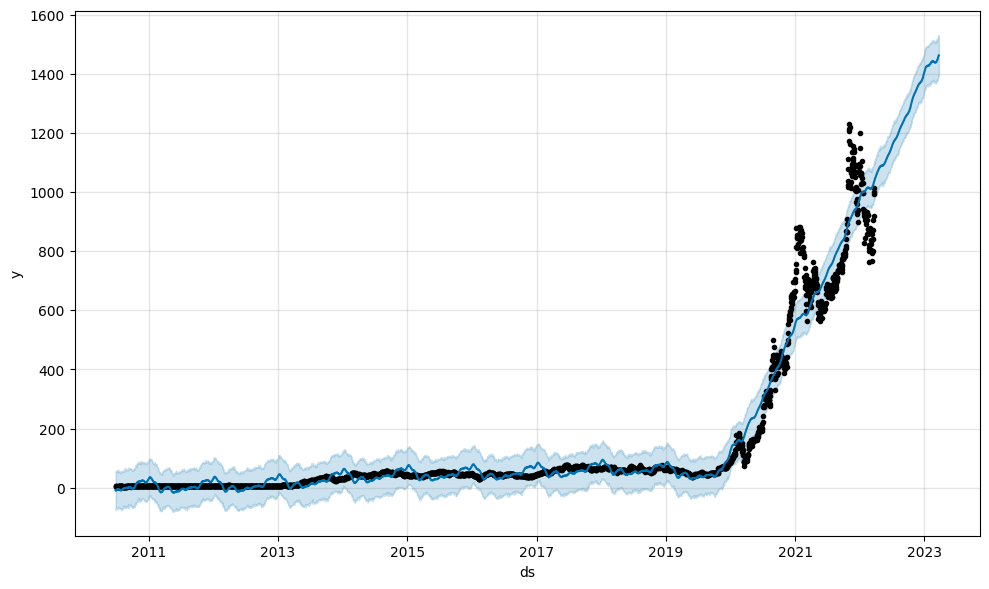

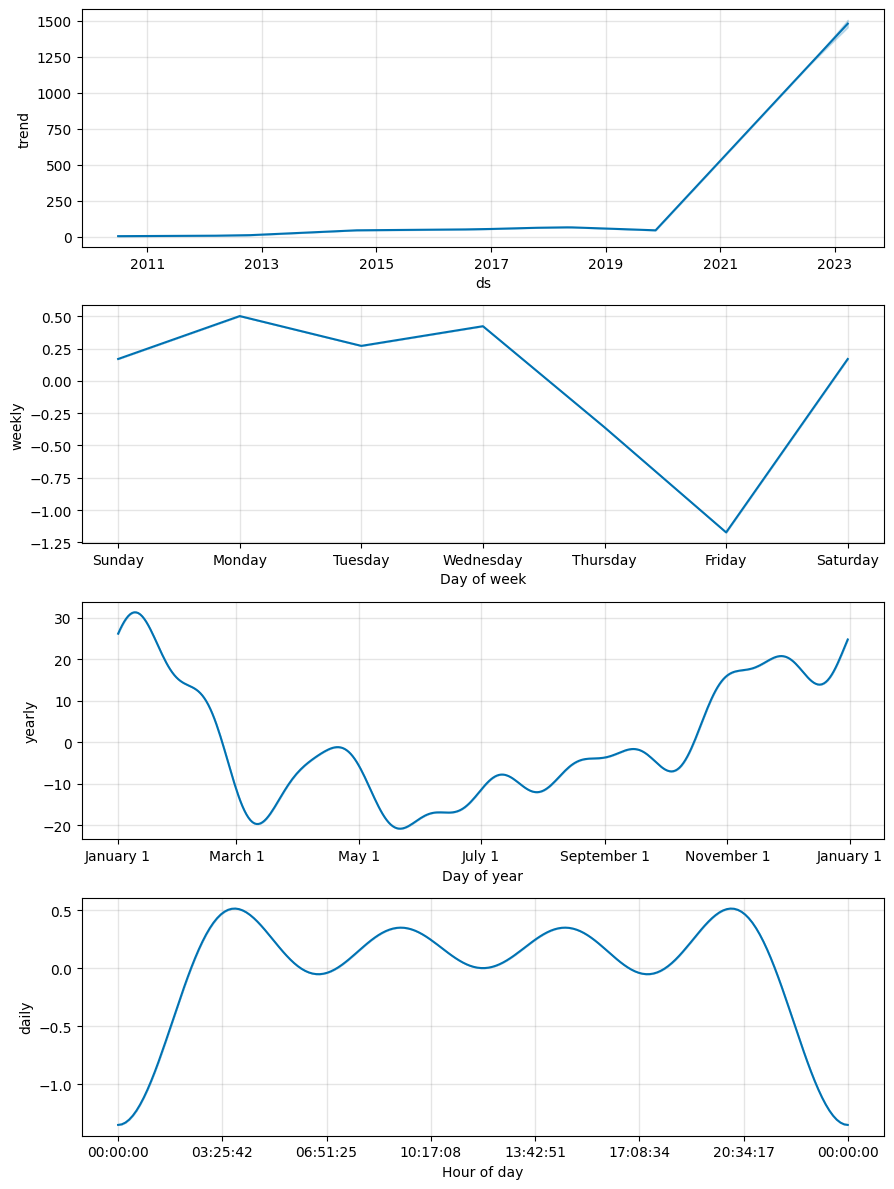

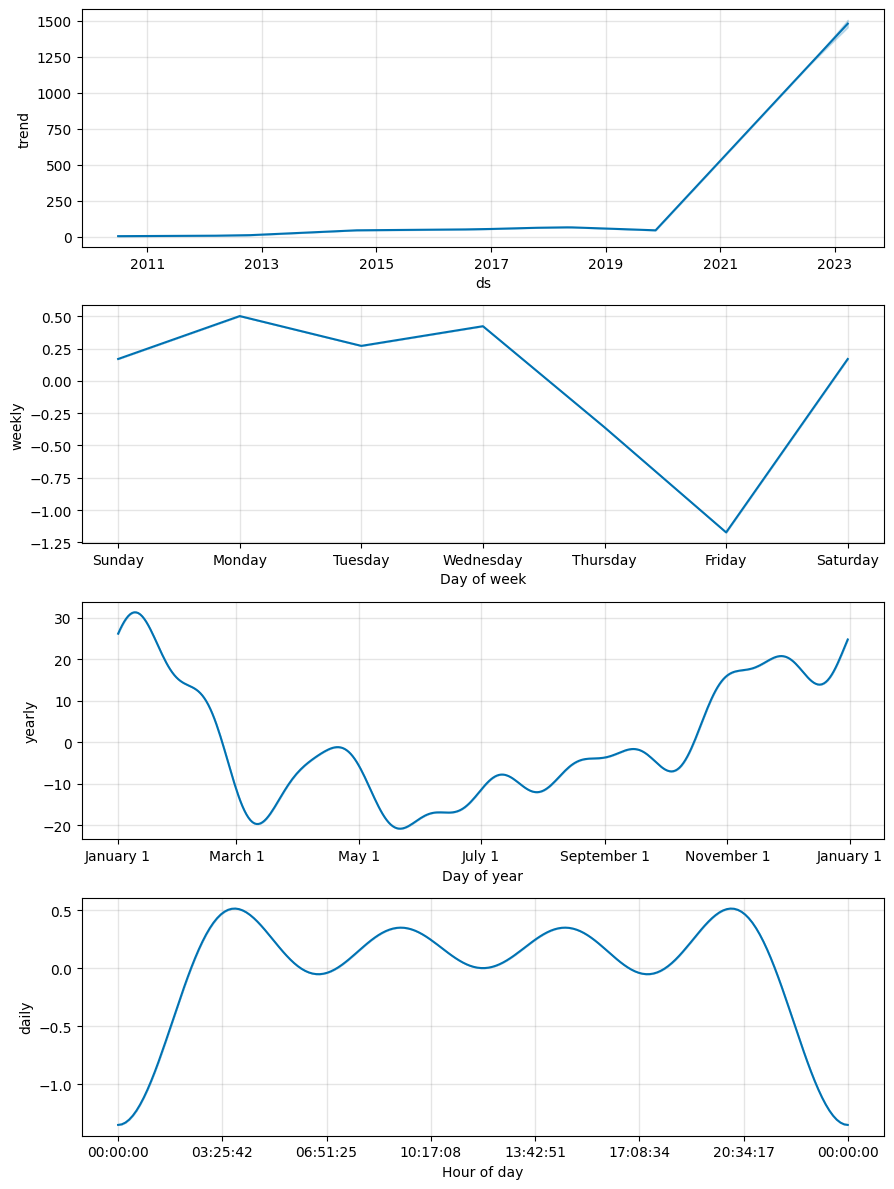

In [17]:
model.plot(forecast)
plt.show()
model.plot_components(forecast)
